# Insurance Price Forecasting

## health insurance price prediction using ML 

### Import required library for basic operations , preprocessing and EDA 

In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset and analyse the dataset for correct predication 


In [85]:
df = pd.read_csv('./new_insurance_raw_data.csv')
df.head()

,customerID,age,gender,bmi,bloodpressure,diabetics,children,smoker,region,premium
0,1,19.0,female,27.9,91.0,Yes,0.0,yes,southwest,16884.92
1,2,18.0,male,33.8,92.0,No,1.0,no,southeast,1725.55
2,3,28.0,male,33.0,93.0,Yes,3.0,no,southeast,4449.46
3,4,33.0,male,22.7,80.0,No,0.0,NaN,northwest,21984.47
4,5,32.0,male,28.9,81.0,No,0.0,no,northwest,3866.86


In [86]:
df.describe()


,customerID,age,bmi,bloodpressure,children,premium
count,63038.000000,63023.000000,62872.000000,62812.000000,62684.000000,63038.000000
mean,31519.500000,40.968329,29.603229,94.402614,2.046519,12792.199104
std,18197.647472,13.827395,6.801630,11.057175,1.556217,12010.585115
min,1.000000,2.000000,-3.100000,73.000000,0.000000,971.870000
25%,15760.250000,29.000000,25.300000,87.000000,1.000000,4437.130000
50%,31519.500000,40.000000,29.600000,93.000000,2.000000,8453.820000
75%,47278.750000,52.000000,33.900000,100.000000,3.000000,16550.890000
max,63038.000000,72.000000,53.900000,149.000000,7.000000,64120.430000


In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63038 entries, 0 to 63037
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerID     63038 non-null  int64  
 1   age            63023 non-null  float64
 2   gender         62441 non-null  object 
 3   bmi            62872 non-null  float64
 4   bloodpressure  62812 non-null  float64
 5   diabetics      62823 non-null  object 
 6   children       62684 non-null  float64
 7   smoker         62522 non-null  object 
 8   region         62717 non-null  object 
 9   premium        63038 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 4.8+ MB


### This dataset contains 63038 data points with 9 independent features and 1 target feature(premium).

## EDA (Exploratory Data Analysis

####   EDA is an approach to analyzing the data using visual techniques.
####   It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.
####   While performing the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.



Handle null values , visualize data and take necessary action based on correlation

In [88]:
df.isnull().sum()

customerID         0
age               15
gender           597
bmi              166
bloodpressure    226
diabetics        215
children         354
smoker           516
region           321
premium            0
dtype: int64

In [89]:
df.drop(['customerID'] , axis = 1 , inplace = True )

In [90]:
df['age'] # as in age column some missing data is there and some of the data is malacious

0        19.0
1        18.0
2        28.0
3        33.0
4        32.0
         ... 
63033    37.0
63034    50.0
63035    50.0
63036    38.0
63037    24.0
Name: age, Length: 63038, dtype: float64

##### age and smoker is one of the most important and sensitive feature for premium prediction so we remove records those are with null values

In [91]:
df = df.dropna(subset = ['age' , 'smoker'])

In [92]:
df.isnull().sum()

age                0
gender           585
bmi              162
bloodpressure    224
diabetics        213
children         327
smoker             0
region           315
premium            0
dtype: int64

#### by looking at dataset we analyze that region , diabetics and gender columns are with high premium charges so it may change predication result by filling those null values so we have to  drop those records 

In [93]:
df = df.dropna(subset = ['gender' , 'region' , 'diabetics'])
df.isna().sum()

age                0
gender             0
bmi              154
bloodpressure    217
diabetics          0
children         315
smoker             0
region             0
premium            0
dtype: int64

#### the rest null values we can fill with the mean of the column for bmi , bloodpressure and diabetics 

In [94]:
df['bloodpressure'].fillna(int(df['bloodpressure'].mean()), inplace=True)

In [95]:
df['bmi'].fillna(int(df['bmi'].mean()), inplace=True)

##### children has not much impact on premium forecasting but for loosing important information we can fill missing values with its mode

In [96]:
df['children'].fillna(df['children'].mode()[0] , inplace= True)

In [97]:
df.isna().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetics        0
children         0
smoker           0
region           0
premium          0
dtype: int64

#### Here we deal with all missing values in our dataset there is no missing values so now its time to getting insights of the data and handling wrong informtion and anamolies in dataset

In [98]:
df = df[(df['age'] >= 18) & (df['age'] <= 60)]


In [99]:
df = df[(df['bmi'] >= 15) & (df['bmi'] <= 50)]

In [100]:
df = df[(df['bloodpressure'] >= 80) & (df['bloodpressure'] <= 120)] 

In [101]:
df.describe()

,age,bmi,bloodpressure,children,premium
count,50514.000000,50514.000000,50514.000000,50514.000000,50514.000000
mean,38.065645,29.789324,93.927248,2.096270,11960.967204
std,11.552305,6.098504,8.558643,1.563856,11779.893930
min,18.000000,15.000000,80.000000,0.000000,971.870000
25%,28.000000,25.500000,87.000000,1.000000,4040.560000
50%,38.000000,29.500000,93.000000,2.000000,7397.470000
75%,48.000000,33.800000,99.000000,3.000000,16397.850000
max,60.000000,50.000000,120.000000,7.000000,64120.430000


### to get more insight about data we need label encodign because gender , diabetis , smoker are textual field we need to convert them in to categorical

In [102]:
df.corr(numeric_only=True)

,age,bmi,bloodpressure,children,premium
age,1.000000,0.070299,0.017119,0.194509,0.231875
bmi,0.070299,1.000000,0.025535,0.049362,0.186522
bloodpressure,0.017119,0.025535,1.000000,0.130824,-0.000339
children,0.194509,0.049362,0.130824,1.000000,0.073060
premium,0.231875,0.186522,-0.000339,0.073060,1.000000


#### the children column has not so much relation with premium so we can exclude this column

Text(0.5, 1.0, 'age vs premium')

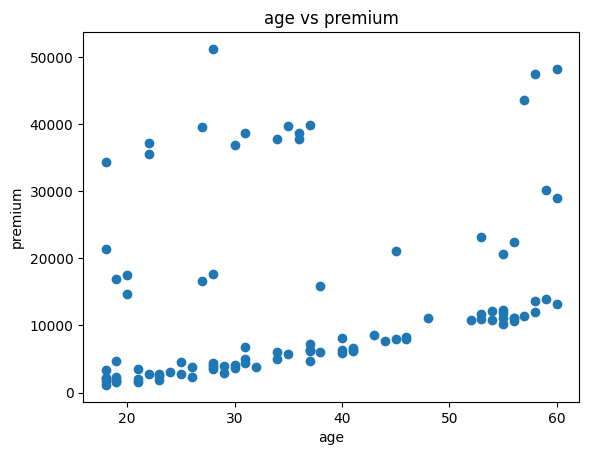

In [103]:
plt.scatter(df['age'].head(100), df['premium'].head(100))
plt.xlabel('age')
plt.ylabel('premium')
plt.title('age vs premium')

<Axes: xlabel='premium', ylabel='Count'>

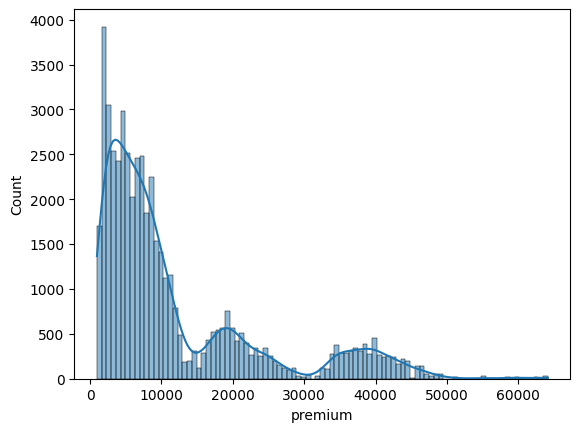

In [104]:
sns.histplot(x= 'premium',data = df,kde = True) 

#### from above graph we can observed that majority of people bought premium of up 10000 and there are very less people who bought premium above 50000

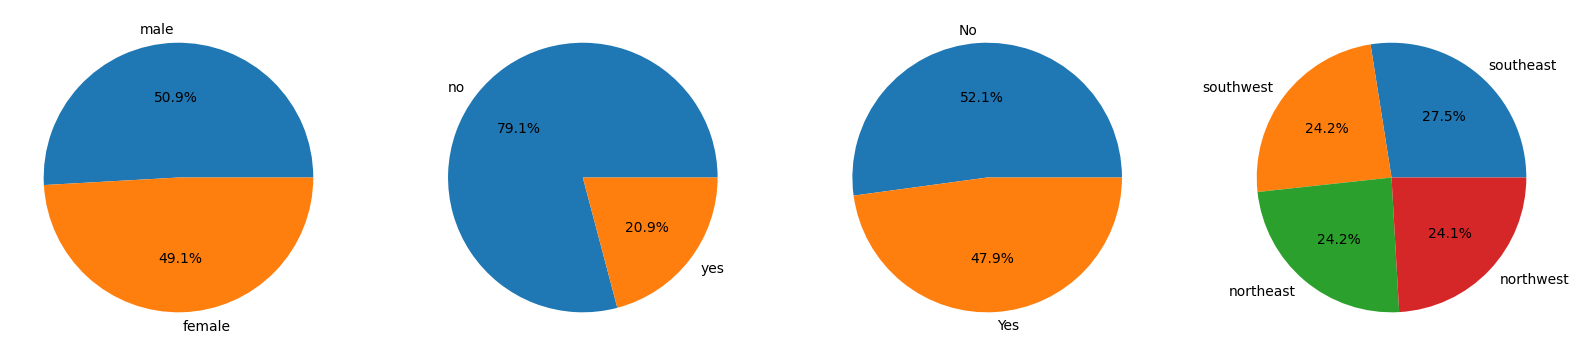

In [105]:

import matplotlib.pyplot as plt

features = ['gender', 'smoker', 'diabetics', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 4, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')

plt.show()


#### By looking at this chart we can conclude that our dataset is unbiased so there is no need for data augmentation .

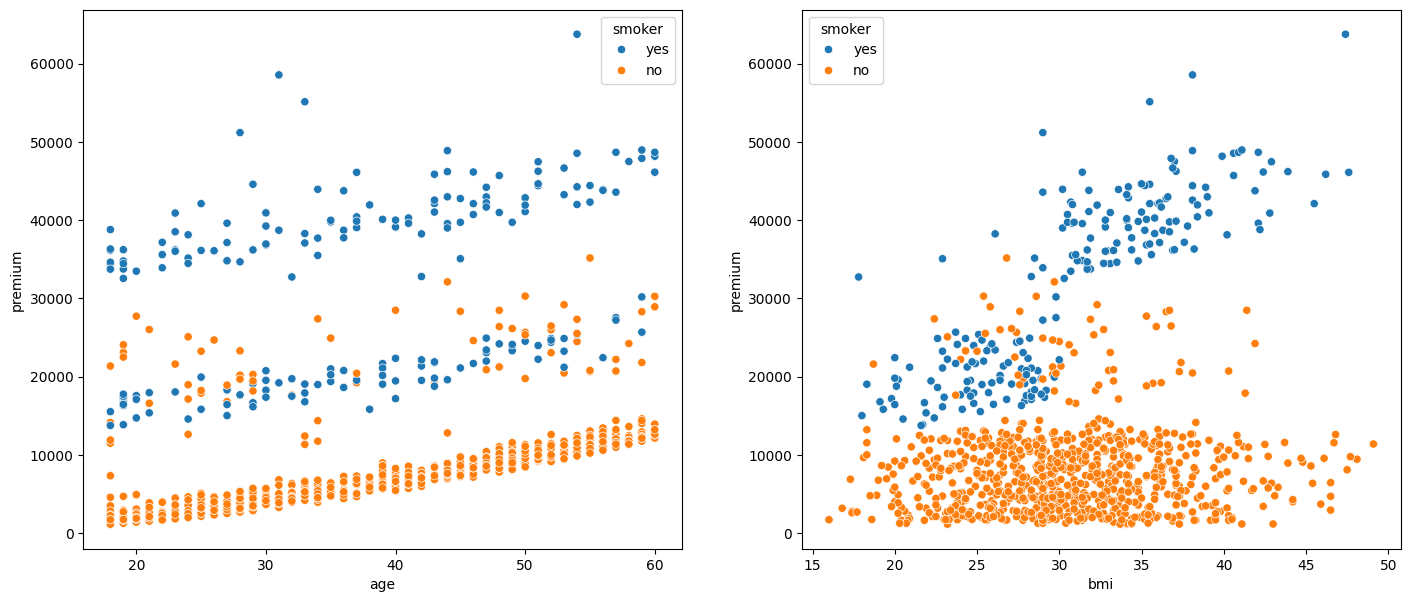

In [106]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df.head(1000), x=col,
				y='premium',
				hue='smoker')
plt.show()



A clear distinction can be observed here between the charges that smokers have to pay more premium . Also here as well we can observe that as the age of a person increases premium price also increases.



## DATA PREPROCESSING

Data preprocessing is technique to clean the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.

IN preprocesing we have problem of label encoding , checking feature standard , standard scaling , find correlation and many more operaion required for data cleaning

### Label encoing for the categorical features

LabelEncoding is a  encoding technique which  is a suitable technique for converting binary categorical data (e.g., Yes/No) and nominal categorical data (e.g., 'gender' , region) into a format that is suitable for machine learning models.

#### after converting all data set into numeric we can get more informaation for model building 

In [107]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Category' column
df['gender'] = label_encoder.fit_transform(df['gender'])
df['diabetics'] = label_encoder.fit_transform(df['gender'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

df.head(10)



,age,gender,bmi,bloodpressure,diabetics,children,smoker,region,premium
0,19.0,0,27.9,91.0,0,0.0,1,southwest,16884.92
1,18.0,1,33.8,92.0,1,1.0,0,southeast,1725.55
2,28.0,1,33.0,93.0,1,3.0,0,southeast,4449.46
4,32.0,1,28.9,81.0,1,0.0,0,northwest,3866.86
6,46.0,0,33.4,86.0,0,1.0,0,southeast,8240.59
7,37.0,0,27.7,100.0,0,2.0,0,northwest,7281.51
8,37.0,1,29.8,86.0,1,2.0,0,northeast,6406.41
9,60.0,0,25.8,97.0,0,0.0,0,northwest,28923.14
10,25.0,1,26.2,88.0,1,0.0,0,northeast,2721.32
12,23.0,1,34.4,81.0,1,0.0,0,southwest,1826.84


#### for region we need to do one hot encoding because it is nominla field 

In [108]:
df = pd.get_dummies(df , columns = ['region'] , prefix = 'r').astype(int)

In [109]:
df.head(10)

,age,gender,bmi,bloodpressure,diabetics,children,smoker,premium,r_northeast,r_northwest,r_southeast,r_southwest
0,19,0,27,91,0,0,1,16884,0,0,0,1
1,18,1,33,92,1,1,0,1725,0,0,1,0
2,28,1,33,93,1,3,0,4449,0,0,1,0
4,32,1,28,81,1,0,0,3866,0,1,0,0
6,46,0,33,86,0,1,0,8240,0,0,1,0
7,37,0,27,100,0,2,0,7281,0,1,0,0
8,37,1,29,86,1,2,0,6406,1,0,0,0
9,60,0,25,97,0,0,0,28923,0,1,0,0
10,25,1,26,88,1,0,0,2721,1,0,0,0
12,23,1,34,81,1,0,0,1826,0,0,0,1


In [110]:
# df['sex']=df['sex'].map({'male':0,'female':1})
# df['smoker']=df['smoker'].map({'yes':1,'no':0})
# df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})


In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 50514 entries, 0 to 63037
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            50514 non-null  int64
 1   gender         50514 non-null  int64
 2   bmi            50514 non-null  int64
 3   bloodpressure  50514 non-null  int64
 4   diabetics      50514 non-null  int64
 5   children       50514 non-null  int64
 6   smoker         50514 non-null  int64
 7   premium        50514 non-null  int64
 8   r_northeast    50514 non-null  int64
 9   r_northwest    50514 non-null  int64
 10  r_southeast    50514 non-null  int64
 11  r_southwest    50514 non-null  int64
dtypes: int64(12)
memory usage: 5.0 MB


#### As all data is in numeric format so find correlation between tables

In [112]:
df.corr()['premium'].sort_values(ascending = False)

premium          1.000000
smoker           0.806507
age              0.231876
bmi              0.185836
children         0.073061
gender           0.066953
diabetics        0.066953
r_southeast      0.065182
r_northeast      0.019028
bloodpressure   -0.000339
r_southwest     -0.041017
r_northwest     -0.046006
Name: premium, dtype: float64

by plotting data we can get more information

##### The only thing we can need to check is for duplicates and presence of outliers.




In [113]:
df.drop_duplicates(inplace=True)

In [114]:
#### If there exists any outliers we should handle here

<Axes: ylabel='age'>

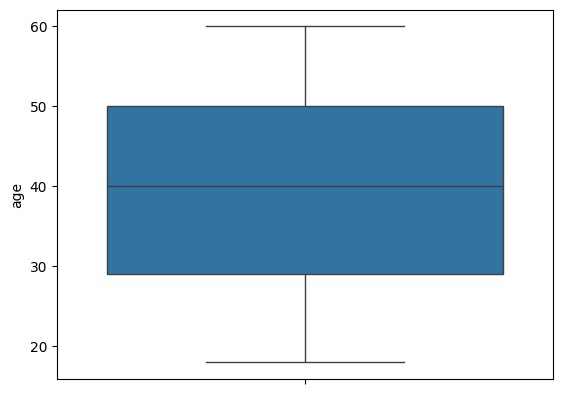

In [115]:
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

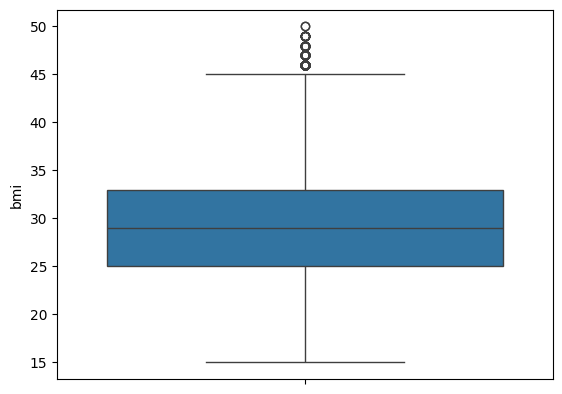

In [116]:
sns.boxplot(df['bmi'])


Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

<Axes: ylabel='bmi'>

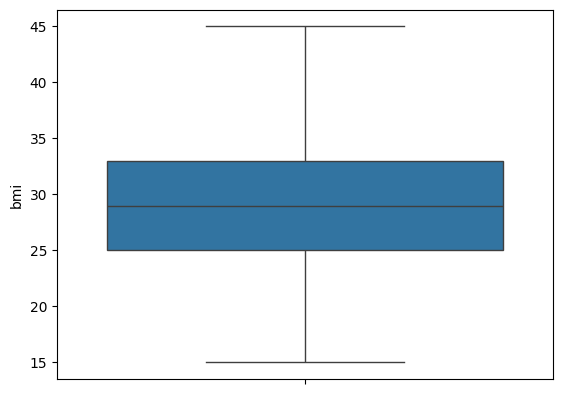

In [117]:
# Assuming you have a DataFrame named 'df' with a 'bmi' column

# Calculate the 25th and 75th percentiles (Q1 and Q3)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for Winsorization
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply Winsorization to the 'bmi' column
df['bmi'] = df['bmi'].clip(lower_bound, upper_bound)

# Plot a boxplot to visualize the capped 'bmi' values
sns.boxplot(df['bmi'])

This code will handle outliers in the 'bmi' column by capping extreme values, making them fall within the defined range while preserving the rest of the data distribution. You can adjust the multiplier (e.g., 1.5) in the IQR-based bounds to control the extent of Winsorization.


Data Wrangling

Data wrangling is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [118]:
df['bmi'].skew()


0.22301427686683753

In [119]:
df['gender'].skew()


-0.028301362462821437

In [120]:
df['age'].skew()

0.02458977148218397

Data in both the age,gender , region and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35127 entries, 0 to 48039
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            35127 non-null  int64
 1   gender         35127 non-null  int64
 2   bmi            35127 non-null  int64
 3   bloodpressure  35127 non-null  int64
 4   diabetics      35127 non-null  int64
 5   children       35127 non-null  int64
 6   smoker         35127 non-null  int64
 7   premium        35127 non-null  int64
 8   r_northeast    35127 non-null  int64
 9   r_northwest    35127 non-null  int64
 10  r_southeast    35127 non-null  int64
 11  r_southwest    35127 non-null  int64
dtypes: int64(12)
memory usage: 3.5 MB


##### FOR VISUALIZATION OF data data need to be converted into 2d so for that PCA should be done 

In [122]:
df.corr()['premium']


age              0.239017
gender           0.067164
bmi              0.187119
bloodpressure   -0.000058
diabetics        0.067164
children         0.067552
smoker           0.800334
premium          1.000000
r_northeast      0.020120
r_northwest     -0.040606
r_southeast      0.067560
r_southwest     -0.049883
Name: premium, dtype: float64

### Reduce all field except premium and custmerID to only one dimension using PCA to find relation

In [124]:
X = df.drop(['premium'], axis=1)

# get dependent variable
Y = df['premium']
df.head()

,age,gender,bmi,bloodpressure,diabetics,children,smoker,premium,r_northeast,r_northwest,r_southeast,r_southwest
0,19,0,27,91,0,0,1,16884,0,0,0,1
1,18,1,33,92,1,1,0,1725,0,0,1,0
2,28,1,33,93,1,3,0,4449,0,0,1,0
4,32,1,28,81,1,0,0,3866,0,1,0,0
6,46,0,33,86,0,1,0,8240,0,0,1,0


In [125]:
from sklearn.decomposition import PCA

# create an object of PCA
pca = PCA(n_components=1)

# fit the data
pca.fit(df)
pca
# transform the data
new_component = pca.transform(df)
A = pd.DataFrame(new_component)
A


,0
0,4543.472096
1,-10615.527058
2,-7891.524721
3,-8474.524247
4,-4100.520531
...,...
35122,-9430.525881
35123,50451.478758
35124,-8932.524932
35125,25688.478925


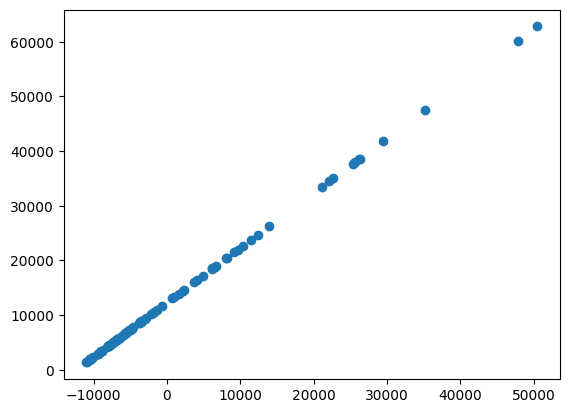

In [126]:
plt.scatter(A.tail(100), df['premium'].tail(100))


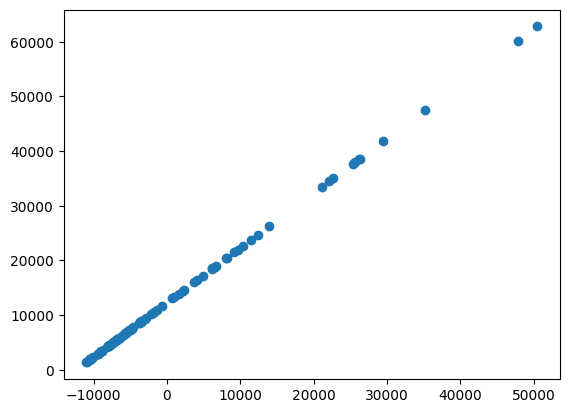

In [127]:

plt.scatter(A.tail(100), df['premium'].tail(100))



##### By observing the we can conclude that our model is having positive relation 

#### data is completely cleaned and it is ready for model building so for that 

In [ ]:
X=df.drop({'premium'},axis=1)
Y=df[['premium']]